In [254]:
import pandas as pd 
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X,d = make_blobs(n_samples=100, centers=2, n_features=3,center_box=(100,200),random_state=0)

 
# to generate your own dataset uncomment this code
# data = {'Feature1':[random.uniform(0, 6) for i in range(100)], 'Feature2':[random.uniform(0, 6) for i in range(100)], 'Feature3':[random.uniform(0, 6) for i in range(100)], 'Feature4':[random.uniform(0,6) for i in range(100)],'Output':[round(random.random()) for i in range(100)]} 
  

# df = pd.DataFrame(data) 
  

d

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

# Load Dataset

In [255]:
#load Dataset
df = pd.read_csv("data_d.csv")
df.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis and Visualisation

In [256]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [257]:
df.shape

(569, 33)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

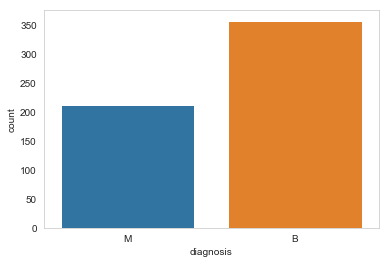

In [259]:
#countplot
ax = sns.countplot(df["diagnosis"],label="Count")      



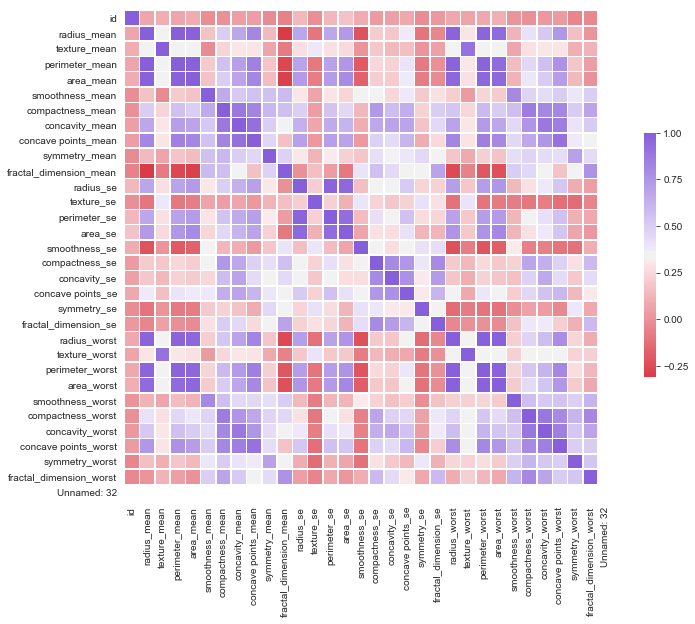

In [260]:
#Correlation matrix
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

# Data Preprocessing

In [261]:
#preprocessing
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)
df.columns.shape
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


In [262]:
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Feature Extraction

In [273]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=3).fit_transform(X,d)
X_new.shape
features_columns = df.columns

fs = SelectKBest(k=3)
fs.fit(X,d)
fer = zip(fs.get_support(),features_columns)

for i,j in fer:
    if i==True:
        print(j)

texture_mean
concavity_mean
fractal_dimension_se
texture_worst
concavity_worst


# Splitting Dataset to train test

In [263]:
d = df['diagnosis'].values
X = df.drop('diagnosis',axis=1).values
    
X_train, X_test, y_train, y_test = train_test_split(X,d, test_size=0.30)


# Single Layer Perceptron Model

initial weight is 
[1.0, 0.3055076165493996, 0.08335694978138286, 0.10850664838909063, 0.22388772427438697, 0.008587022454108695, 0.23284020287000262, 0.6603006957715144, 0.19418800805593117, 0.6105809331390794, 0.26788080980752593, 0.021042337942946965, 0.1056253932964909, 0.3434475397563075, 0.19893343688743448, 0.9585537653046885, 0.4164003573170102, 0.5685549324623874, 0.7408939922794093, 0.4893333161729977, 0.8956666793997088, 0.01514547960972168, 0.7450989583108415, 0.6120256175666785, 0.5156758029605448, 0.9641468622341429, 0.4734910826561225, 0.7907337919274918, 0.09404975691254713, 0.008051766035316987, 0.027233327754644265]
epoch = 0   error = 45
epoch = 1   error = 35
epoch = 2   error = 21
epoch = 3   error = 23
epoch = 4   error = 15
epoch = 5   error = 19
epoch = 6   error = 13
epoch = 7   error = 13
epoch = 8   error = 11
epoch = 9   error = 12
epoch = 10   error = 8
epoch = 11   error = 9
epoch = 12   error = 8
epoch = 13   error = 8
epoch = 14   error = 5
epoch = 15   

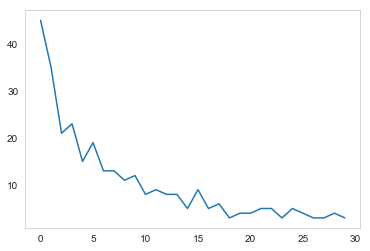

In [264]:
#perceptron
finals = []
from sklearn.metrics import accuracy_score
import random
class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02):
        self.epochs = epochs
        self.alpha = alpha
#         self.input_size = input_size
        weight = [random.random() for i in range(input_size+1)]
        weight[0] = 1.0
        self.weight = weight
        print("initial weight is ")
        print(weight)
#         self.weight = np.zeros(input_size+1)
    def activation(self,x):
        return 1 if x>=0 else 0
    def predict(self,x):
#         print(self.weight.T)
#         print(X)
       
        z = np.dot(self.weight,x)
#         print(z)
#         print(self.activation(z))
        a = self.activation(z)
        return a
   
    
    def learn(self,X,d):
#         final = []
        for j in range(self.epochs):
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            finals.append(abs(sum))
            print("epoch = "+str(j)+"   error = "+str(abs(sum)))
#             print("Error" +str(sum))
#             print(self.weight)
        print("learning curve")
        plt.plot(range(self.epochs),finals)
                
if __name__ == '__main__':

    

    input_size = 30
    learning_rate = 0.02
    iterations = 30
    perceptron = Perceptron(input_size=30,alpha = learning_rate,epochs = iterations)
    perceptron.learn(X_train,y_train )


    print("The learned weight is ")
    print(perceptron.weight)

print("Learning Rate = "+str(learning_rate))
y_pred_train = []
for i in range(X_train.shape[0]):
    x= np.insert(X_train[i],0,1)
    y_pred_train.append(perceptron.predict(x))
  
    
print("Training data Accuracy = " +str(accuracy_score(y_train, y_pred_train)))
conftrain = confusion_matrix(y_train,y_pred_train)

y_pred_test = []
finals2 = []

for i in range(X_test.shape[0]):
    x= np.insert(X_test[i],0,1)
    y_pred_test.append(perceptron.predict(x))
#     print(y_pred_test)
# print("Hi");print(X_train)
# print(X_train)
# print(y_train)
# print(y_pred_train)

# print(y_pred)
print("Testing data Accuracy = " +str(accuracy_score(y_test, y_pred_test)))
conftest = confusion_matrix(y_test, y_pred_test)

# Evaluation Metrics

Confusion Matrix:Testing Data
Confusion Matrix:Training Data


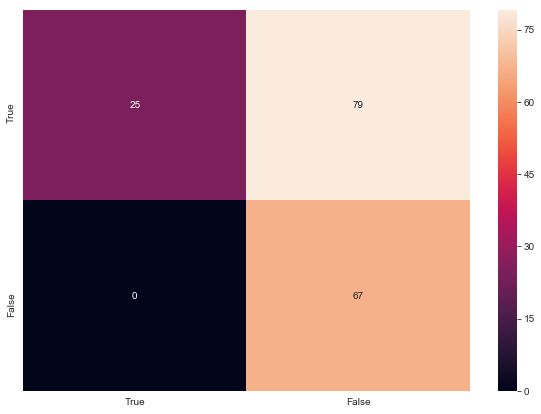

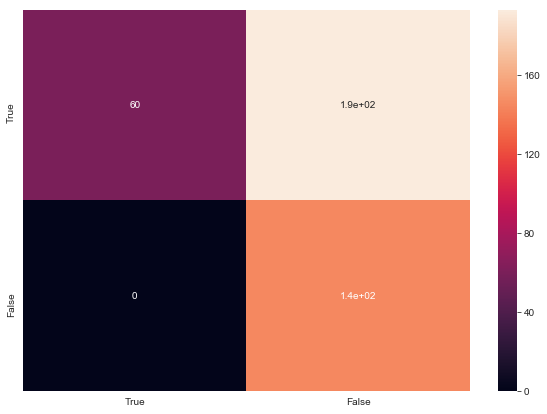

In [265]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
print("Confusion Matrix:Testing Data")
df_cm = pd.DataFrame(conftest, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Confusion Matrix:Training Data")
df_cm = pd.DataFrame(conftrain, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [266]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [267]:
df.head()
features_list.shape


(31,)

In [269]:
kb = SelectKBest(chi2,k=3) # configure SelectKBest
kb.fit(X, d)  # fit it to your data
# get_support gives a vector [False, False, True, False....]
features_list = df.columns
print(features_list[kb.get_support()])


IndexError: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 30

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(30,30))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

a = feature_1
b = feature_2
c = feature_3
print(y)
# x = [i if i<600 else 800 for i in x[:,0]]
# y = [i if i<600 else 800 for i in y[:,0]]

# z = [i if i<600 else 800 for i in z[:,0]]



print(max(feature_1))

ax.scatter(a, b, c, c=d, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()